## Load Data

In [1]:
import pandas as pd

In [2]:
all_reviews = pd.read_csv('Hotel_Reviews.csv')
all_reviews.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
all_reviews['Review_Polarity'] = all_reviews['Reviewer_Score'].apply(lambda x: 1 if x >= 5 else 0)
review_content = all_reviews[['Positive_Review', 'Negative_Review', 'Reviewer_Score', 'Review_Polarity']]
review_content.head(5)

,Positive_Review,Negative_Review,Reviewer_Score,Review_Polarity
0,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,2.9,0
1,No real complaints the hotel was great great ...,No Negative,7.5,1
2,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.1,1
3,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,3.8,0
4,Amazing location and building Romantic setting,You When I booked with your company on line y...,6.7,1


## Clean and Preprocess Data

In [4]:
review_content['Positive_Review'] = review_content['Positive_Review'].apply(lambda review: review.replace('No Positive', ''))
review_content['Negative_Review'] = review_content['Negative_Review'].apply(lambda review: review.replace('No Negative', ''))
review_content.head(5)

/Users/shannywu/.local/share/virtualenvs/hotel-reviews-analysis-iubmQ_oi/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shannywu/.local/share/virtualenvs/hotel-reviews-analysis-iubmQ_oi/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Positive_Review,Negative_Review,Reviewer_Score,Review_Polarity
0,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,2.9,0
1,No real complaints the hotel was great great ...,,7.5,1
2,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.1,1
3,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,3.8,0
4,Amazing location and building Romantic setting,You When I booked with your company on line y...,6.7,1


In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shannywu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [7]:
def get_lower_text(text):
    return text.lower()

def tokenize_text(text):
    return text.strip().split(' ')

def remove_stop_words(text):
    stop_words = stopwords.words('english')
    return [word for word in text if word not in stop_words]

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_token(text_with_pos):
    return [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in text_with_pos]

In [8]:
def clean_text(text):
    if not isinstance(text, str):
        return []

    text = get_lower_text(text)
    text = tokenize_text(text)
    text = remove_stop_words(text)
    text = [token for token in text if len(token) > 0]
    pos_tags = pos_tag(text)    
    text = lemmatize_token(pos_tags)

    return text

In [9]:
review_content['Positive_Review'].head(5)

0     Only the park outside of the hotel was beauti...
1     No real complaints the hotel was great great ...
2     Location was good and staff were ok It is cut...
3     Great location in nice surroundings the bar a...
4      Amazing location and building Romantic setting 
Name: Positive_Review, dtype: object

In [95]:
review_content['Positive_Review_Clean'] = review_content['Positive_Review'].head(1000).apply(lambda x: clean_text(x))
review_content['Negative_Review_Clean'] = review_content['Negative_Review'].head(1000).apply(lambda x: clean_text(x))

review_content.head(5)

/Users/shannywu/.local/share/virtualenvs/hotel-reviews-analysis-iubmQ_oi/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shannywu/.local/share/virtualenvs/hotel-reviews-analysis-iubmQ_oi/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Positive_Review,Negative_Review,Reviewer_Score,Review_Polarity,Positive_Review_Clean,Negative_Review_Clean
0,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,2.9,0,"[park, outside, hotel, beautiful]","[angry, make, post, available, via, possible, ..."
1,No real complaints the hotel was great great ...,,7.5,1,"[real, complaint, hotel, great, great, locatio...",[]
2,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.1,1,"[location, good, staff, ok, cute, hotel, break...","[room, nice, elderly, bit, difficult, room, tw..."
3,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,3.8,0,"[great, location, nice, surroundings, bar, res...","[room, dirty, afraid, walk, barefoot, floor, l..."
4,Amazing location and building Romantic setting,You When I booked with your company on line y...,6.7,1,"[amaze, location, building, romantic, setting]","[book, company, line, show, picture, room, thi..."


## Features

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

1. most commom ngrams
2. most common ngrams with specific words e.g., location, transportation, service, and staff.

In [18]:
from collections import Counter
from nltk import ngrams

In [98]:
def get_review_text_list(review_key):
    review_text_list = list(review_content[review_key].head(1000))
    review_text_list = list(filter(lambda review: len(review) > 1, review_text_list))

    return review_text_list

In [106]:
neg_review_text_list = get_review_text_list('Negative_Review_Clean')
pos_review_text_list = get_review_text_list('Positive_Review_Clean')

In [172]:
def get_ngram_with_specific_word(vocabs, specific_word):
    words = {}
    for ngram, count in vocabs.items():
        if specific_word in ngram:
            words[ngram] = count

    return words

In [182]:
def get_top_n_ngrams(review_text_list, ngram=2, top_n=10, specific_word=None):
    joined_text = list(map(lambda x: ' '.join(x), review_text_list))
    counter = CountVectorizer(
        analyzer = 'word',
        ngram_range=(ngram, ngram))
    ngrams = counter.fit_transform(joined_text)
    vocabs = counter.vocabulary_
    counts = ngrams.toarray().sum(axis=0)
    
    if specific_word:
        words = get_ngram_with_specific_word(vocabs, specific_word)
    else:
        words = vocabs

    top_n_ngrams = [(ngram, counts[i]) for ngram, i in words.items()]
    top_n_ngrams = sorted(top_n_ngrams, key=lambda x: x[1], reverse=True)[:top_n]
    
    return top_n_ngrams

In [192]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [195]:
def generate_word_cloud(top_n_ngram_list):
    text = ''
    for ngram, cnt in top_n_ngram_list:
        text += ngram + ' '
    wordcloud = WordCloud(background_color='white').generate(text)
    
    return wordcloud

In [199]:
neg_top_10_bigram_location = get_top_n_ngrams(neg_review_text_list, specific_word='location')
neg_top_10_bigram_location

[('star location', 1),
 ('location star', 1),
 ('room allocation', 1),
 ('cramp location', 1),
 ('location generally', 1),
 ('location little', 1),
 ('expensive location', 1),
 ('location require', 1),
 ('location great', 1),
 ('location unfortunately', 1)]

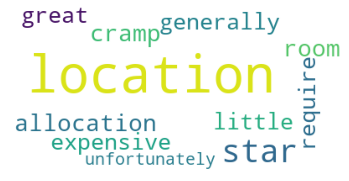

In [201]:
neg_wordcloud_location = generate_word_cloud(neg_top_10_bigram_location)
plt.imshow(neg_wordcloud_location)
plt.axis("off")
plt.show()

In [204]:
pos_top_10_bigram_location = get_top_n_ngrams(pos_review_text_list, specific_word='location')
pos_top_10_bigram_location

[('great location', 52),
 ('good location', 44),
 ('excellent location', 30),
 ('location great', 25),
 ('location good', 20),
 ('location near', 13),
 ('location excellent', 13),
 ('quiet location', 12),
 ('location close', 12),
 ('location staff', 11)]

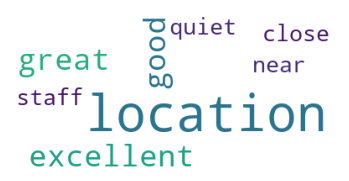

In [205]:
pos_wordcloud_location = generate_word_cloud(pos_top_10_bigram_location)
plt.imshow(pos_wordcloud_location)
plt.axis("off")
plt.show()